In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing



data=pd.read_csv("https://raw.githubusercontent.com/OxCGRT/USA-covid-policy/master/data/OxCGRT_US_latest.csv")


In [2]:
data_new=data[["RegionName", "Jurisdiction", "Date", 'StringencyIndexForDisplay', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndexForDisplay']]

In [3]:
data=data_new[data.Jurisdiction=="STATE_ALL"]

In [4]:
data_new.drop('Jurisdiction', axis=1, inplace=True)

In [5]:
data=data_new

In [6]:
data_jan=data[data.Date.astype(str).str.contains("202001")]
# print(data_jan.head)

In [7]:
columns_to_normalize=["StringencyIndexForDisplay", "GovernmentResponseIndexForDisplay", "ContainmentHealthIndexForDisplay", "EconomicSupportIndexForDisplay"]
def normalize_columns():
    for i in columns_to_normalize:
        max=data_jan[i].max()
        min=data_jan[i].min()
        new_str=i+"_norm"
        data_jan[new_str]=(data_jan[i]-min)/(max-min)

In [8]:
normalize_columns()
# print(data_jan.head)

<ipython-input-7-060f583f63e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jan[new_str]=(data_jan[i]-min)/(max-min)


In [9]:
data_jan.dropna(axis=0, how="any", inplace=True)

<ipython-input-9-8f39d1243874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jan.dropna(axis=0, how="any", inplace=True)


<ipython-input-10-47303145dc61>:8: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  km = km.fit(jan_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm']])
<ipython-input-10-47303145dc61>:8: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  km = km.fit(jan_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm']])
<ipython-input-10-47303145dc61>:8: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  km = km.fit(jan_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 

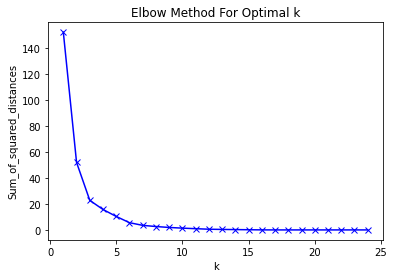

In [10]:
# find OPTIMAL value for kmeans
from sklearn.cluster import KMeans
jan_kmeans = pd.DataFrame(data_jan, columns=['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm'])
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(jan_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm']])
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [11]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(jan_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm']])
jan_kmeans['Cluster'] = y
jan_kmeans["State"]=data_jan["RegionName"]
print(jan_kmeans.head())

     StringencyIndexForDisplay_norm  GovernmentResponseIndexForDisplay_norm  \
261                             0.0                                     0.0   
262                             0.0                                     0.0   
263                             0.0                                     0.0   
264                             0.0                                     0.0   
265                             0.0                                     0.0   

     ContainmentHealthIndexForDisplay_norm  \
261                                    0.0   
262                                    0.0   
263                                    0.0   
264                                    0.0   
265                                    0.0   

     EconomicSupportIndexForDisplay_norm  Cluster   State  
261                                  0.0        0  Alaska  
262                                  0.0        0  Alaska  
263                                  0.0        0  Alaska  
264     

In [12]:
# JAN make dictionaries of each state in each cluster and how many datapoints from that state are in that cluster

jan_cluster1={}
jan_cluster2={}
jan_cluster3={}
jan_cluster4={}
jan_cluster5={}
jan_cluster6={}
jan_cluster7={}
jan_cluster0={}
list_of_clusters_dicts=[jan_cluster0,jan_cluster1,jan_cluster2,jan_cluster3,jan_cluster4,jan_cluster5,jan_cluster6,jan_cluster7]

for index, row in jan_kmeans.iterrows():
    for i in range(0,8):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters_dicts[i]:
                list_of_clusters_dicts[i][row["State"]]+=1
            else:
                list_of_clusters_dicts[i][row["State"]]=1

list_of_clusters_dicts=[jan_cluster0,jan_cluster1,jan_cluster2,jan_cluster3,jan_cluster4,jan_cluster5,jan_cluster6,jan_cluster7]

states_and_their_clusters={}
for index, row in jan_kmeans.iterrows():
    if row["State"] in states_and_their_clusters:
        pass
    else:
        state_dict={}
        for i in range(len(list_of_clusters_dicts)):
            if row["State"] in list_of_clusters_dicts[i]:
                state_dict[i+1]=list_of_clusters_dicts[i][row["State"]]
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster= state_dict_keys[max_ind]
        states_and_their_clusters[row["State"]]= max_cluster
# print(states_and_their_clusters)

clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}

for i in states_and_their_clusters.keys():
    for j in range(1,9):
        if states_and_their_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)
                
    

{1: ['Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Wisconsin', 'West Virginia', 'Wyoming'], 2: [], 3: ['Washington'], 4: ['Alaska', 'Kentucky'], 5: [], 6: [], 7: [], 8: []}


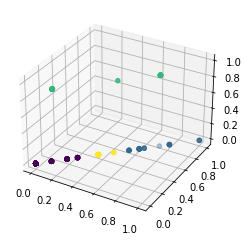

In [13]:
# 4d plot for jan kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = jan_kmeans["GovernmentResponseIndexForDisplay_norm"]
y = jan_kmeans["ContainmentHealthIndexForDisplay_norm"]
z = jan_kmeans["EconomicSupportIndexForDisplay_norm"]
# c = jan_kmeans["StringencyIndexForDisplay_norm"]
s= jan_kmeans["StringencyIndexForDisplay_norm"]
# img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
# img = ax.scatter(x, y, z)

categories = np.unique(jan_kmeans["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
jan_kmeans["Color"] = jan_kmeans["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=jan_kmeans.Color)


# fig.colorbar(img)
plt.show()


In [14]:
# 5d plot for jan kmeans

import plotly
import plotly.graph_objs as go

#Set marker properties
markersize = jan_kmeans['StringencyIndexForDisplay_norm'] *30
markercolor = jan_kmeans['Cluster']

#Make Plotly figure
fig1 = go.Scatter3d(x=jan_kmeans["GovernmentResponseIndexForDisplay_norm"],
                    y=jan_kmeans["ContainmentHealthIndexForDisplay_norm"],
                    z=jan_kmeans["EconomicSupportIndexForDisplay_norm"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers', hovertemplate="%{text}" +"<br>Stringency Index (out of 100): %{marker.size:,} <br> Gov't Response Index: %{x}"+"<br>Containment Health Index: %{y}"+ "<br>Economic Support Index: %{z}",
                    text=jan_kmeans.State)

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Gov't Response Index"),
                                yaxis=dict( title="Containment Health Index"),
                                zaxis=dict(title="Economic SUpport INdex")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("jan K means.html")
                   )


'jan K means.html'